# Assignment 3: Fitting Data to Models

**Name - Yogesh Agarwala**<br>
**Roll no. - EE19B130**

In [ ]:
"""
Before running this notebook:
1. Generate fitting.dat file by running generate_data.py code
2. Make sure fitting.dat and this notebook are in the same folder
"""

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

### Q2. Reading data from files and parsing them

In [3]:
filedata = np.loadtxt('fitting.dat')
time = filedata[:,0]
data = filedata[:,1:]

### Q3. Plotting the data

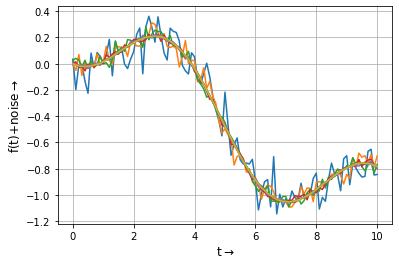

In [4]:
# Plotting
x=time
y=data
plt.grid()
plt.plot(x,y)
plt.xlabel(r't$\rightarrow$',fontsize=12)
plt.ylabel(r'f(t)+noise$\rightarrow$',fontsize=12)
plt.show()

### Q4. Fitting a Function to this data

In [5]:
def g(t,A,B):
    return A*sp.jn(2,t) + B*t

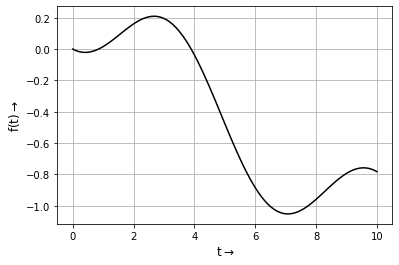

In [6]:
# Plot of the Fitting Function
A=1.05
B=-0.105
plt.grid()
plt.plot( time , g(time,A,B),'-k',label='True curve')
plt.xlabel(r't$\rightarrow$',fontsize=12)
plt.ylabel(r'f(t)$\rightarrow$',fontsize=12)
plt.show()

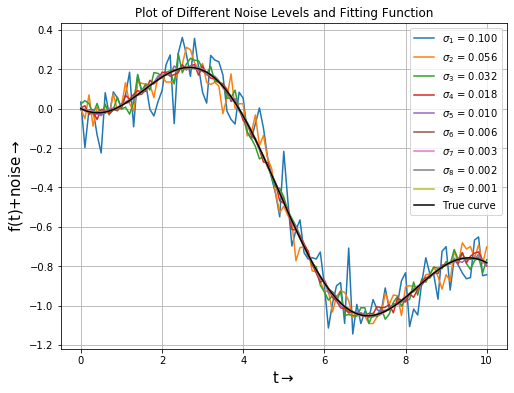

In [7]:
plt.figure(figsize=(8,6))
sigma = np.logspace(-1,-3,9)

#Different Noise Levels
for i in range(9):
    plt.plot(x,y[:,i],label=f'$\sigma_{i+1}$ = %.3f'%sigma[i])

# Plot of the Fitting Function
A=1.05
B=-0.105
plt.grid()
plt.plot( x , g(x,A,B),'-k',label='True curve')
plt.title(r'Plot of Different Noise Levels and Fitting Function')
plt.xlabel(r't$\rightarrow$',fontsize=15)
plt.ylabel(r'f(t)+noise$\rightarrow$',fontsize=15)
plt.legend(loc='upper right')
plt.show()

### Q5. The Errorbar plot

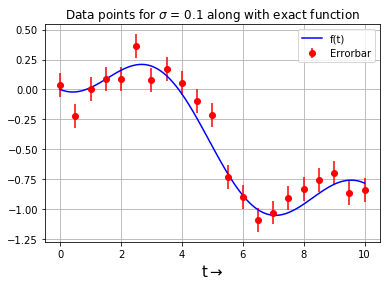

In [8]:
data = y[:,0]
plt.grid()
plt.plot(time,g(time,1.05,-0.105),'b',label='f(t)')
plt.errorbar(time[::5],data[::5],sigma[0],fmt='ro',label='Errorbar')
plt.legend(loc='upper right')
plt.title('Data points for $\sigma$ = ' + str(sigma[0]) + ' along with exact function')
plt.xlabel(r't$\rightarrow$',fontsize=15)
plt.show()

### Q6. The Matrix Equation

In [9]:
# construct M matrix
fn_column = sp.jn(2,time)
M = np.c_[fn_column,time]

# parameter matrix
A = 1.05; B = -0.105
p = np.array([A,B])

# column vector obtained by multiplication of matrix M and p
G1 = np.matmul(M,p) 

In [10]:
# column vector obtained directly from the function g(t,A,B)
G2 = np.array(g(time,A,B))

In [11]:
# testing equality
if np.array_equal(G1,G2):
    print('Yes, the above two column vectors are equal.')
else:
    print('No, the above two column vectors are not equal.')

Yes, the above two column vectors are equal.


### Q7. Mean Squared Error

In [12]:
y_data = G1 #first column of data
y_actual = G2 #actual model

error = (np.square(y_data - y_actual)).mean()
print("Mean square error in calcutaion of M = ",error)

Mean square error in calcutaion of M =  0.0


### Q8. Contour Plot of Error

In [13]:
#initialization
e = np.zeros((21,21,9))
A = np.linspace(0,2,21)

B = np.linspace(-0.2,0,21)

for k in range(9):
    f = y[:,k]
    for i in range(21):
        for j in range(21):
            e[i][j][k] = np.sum((f -np.array(g(time,A[i],B[j])))**2)/101

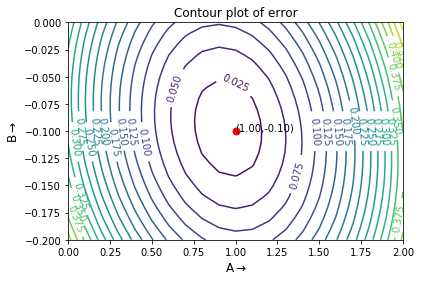

In [14]:
# plotting the contour and locating the minima
plot = plt.contour(A,B,e[:,:,0],20)
plt.title('Contour plot of error')
plt.xlabel(r'A$\rightarrow$',fontsize=12)
plt.ylabel(r'B$\rightarrow$',fontsize=12)
plt.clabel(plot,inline=1,fontsize=10)

# Using np.unravel_index to obtain the location of the minima in the original array
a = np.unravel_index(np.argmin(e[:,:,0]),e[:,:,0].shape)
plt.plot(A[a[0]],B[a[1]],'ro',markersize=7)
plt.annotate('(%0.2f,%0.2f)'%(A[a[0]],B[a[1]]),(A[a[0]],B[a[1]]))
plt.show()

### Q9. Best estimate of A and B (least mean square estimation)

In [15]:
def estimateAB(M,b):
    return np.linalg.lstsq(M,b,rcond=None)

def error_prediction(estimated,actual):
    A0,B0 = actual[0], actual[1]
    A1,B1 = estimated[0], estimated[1]
    return abs(A0-A1), abs(B0-B1)

In [16]:
# construct M matrix
fn_column = sp.jn(2,time)
M = np.c_[fn_column,time]

In [17]:
AB = [1.05, -0.105]
estimatedAB,_,_,_ = estimateAB(M,y[:,1]) #for first column data
print("Estimated A,B  = ",list(estimatedAB))

errorA, errorB = error_prediction(estimatedAB,AB)
print("Error in A,B = ", [errorA, errorB])

Estimated A,B  =  [1.0598311905174036, -0.10454165768706138]
Error in A,B =  [0.009831190517403554, 0.00045834231293861993]


### Q10. Error vs $\sigma_{n}$ plot on $linear$ scale

In [18]:
"""
error in the estimate of A and B for different data columns
"""
error_a = []
error_b = []
mean_error = []
for i in range(9):
    estimatedAB,error,_,_ = estimateAB(M ,y[:,i])
    error_a.append(error_prediction(estimatedAB,AB)[0])
    error_b.append(error_prediction(estimatedAB,AB)[1])
    mean_error.append(error)

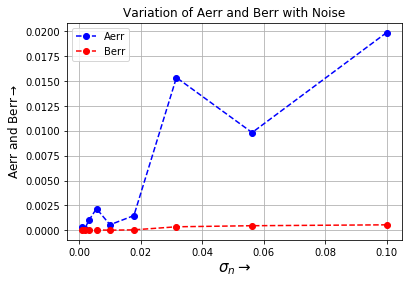

In [19]:
plt.grid()
plt.plot(sigma,error_a,'bo--',label='Aerr')
plt.plot(sigma,error_b,'ro--',label='Berr')
plt.title("Variation of Aerr and Berr with Noise")
plt.xlabel(r'$\sigma_{n}\rightarrow$',fontsize=15)
plt.ylabel(r'Aerr and Berr$\rightarrow$',fontsize=12)
plt.legend(loc='upper left')
plt.show()

### Error returned by lstsq vs Noise on $linear$ scale

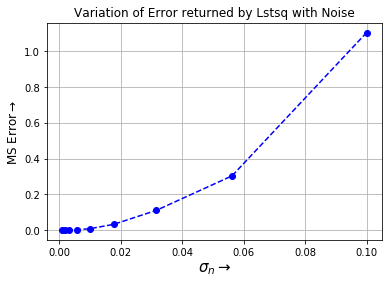

In [20]:
plt.grid()
plt.plot(sigma,mean_error, 'bo--')
plt.title("Variation of Error returned by Lstsq with Noise")
plt.xlabel(r'$\sigma_n\rightarrow$',size=15)
plt.ylabel(r'MS Error$\rightarrow$',size=12)
plt.show()

### Q11. Error vs $\sigma_{n}$ plot in $loglog$ scale

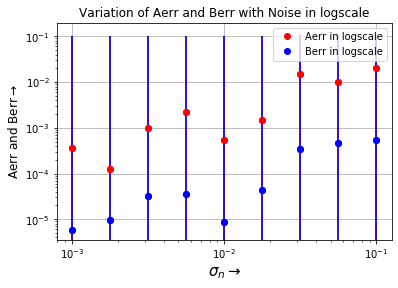

In [21]:
plt.grid()
plt.loglog(sigma,error_a,'ro', label='Aerr in logscale')
plt.loglog(sigma,error_b,'bo', label='Berr in logscale')
plt.errorbar(sigma,error_a,yerr=0.1,fmt ='ro')
plt.errorbar(sigma,error_b,yerr=0.1,fmt ='bo')
plt.title('Variation of Aerr and Berr with Noise in logscale')
plt.xlabel(r'$\sigma_{n}\rightarrow$',fontsize=15)
plt.ylabel(r'Aerr and Berr$\rightarrow$',fontsize=12)
plt.legend(loc='upper right')
plt.show()

### Error returned by Lstsq with Noise in $loglog$ scale

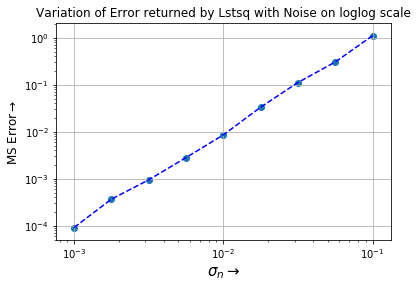

In [22]:
plt.grid()
plt.loglog(sigma,mean_error, 'b--',basex = 10)
plt.scatter(sigma,mean_error)
plt.title("Variation of Error returned by Lstsq with Noise on loglog scale")
plt.xlabel(r'$\sigma_n\rightarrow$',size=15)
plt.ylabel(r'MS Error$\rightarrow$',size=12)
plt.show()